In [1]:
# importing required lib
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import warnings
import missingno as mno
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

warnings.filterwarnings('ignore')

> ## reading the data

In [2]:
df = pd.read_csv("/Users/mohammadjuneidk/Downloads/Project/India.csv")

> ## checking the dataframe randomly

In [3]:
df.tail(5).style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'lawngreen',                       
                                    'border-color': 'white'})

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
774,06-03-2022,42967315.000000,0.000000,967279389.000000,801141086.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
775,07-03-2022,42971308.000000,0.000000,967460932.000000,802358408.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
776,08-03-2022,42975883.000000,0.000000,967725805.000000,804228336.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
777,09-03-2022,42980067.000000,0.000000,967946798.000000,805886615.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
778,10-03-2022,42984261.000000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [4]:
df.tail(5).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#7CAE00'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#red')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'blue')]},
 
]
)

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
774,06-03-2022,42967315.000000,0.000000,967279389.000000,801141086.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
775,07-03-2022,42971308.000000,0.000000,967460932.000000,802358408.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
776,08-03-2022,42975883.000000,0.000000,967725805.000000,804228336.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
777,09-03-2022,42980067.000000,0.000000,967946798.000000,805886615.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
778,10-03-2022,42984261.000000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [5]:
#df.style.background_gradient(subset = ["confirmed"])
df.tail(5).style.set_properties(subset = ["confirmed"],
                        **{"background-color": "lightblue",  
                           "color" : "white",
                           "border" : "0.5px solid white"})

                           

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
774,06-03-2022,42967315.000000,0.000000,967279389.000000,801141086.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
775,07-03-2022,42971308.000000,0.000000,967460932.000000,802358408.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
776,08-03-2022,42975883.000000,0.000000,967725805.000000,804228336.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
777,09-03-2022,42980067.000000,0.000000,967946798.000000,805886615.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
778,10-03-2022,42984261.000000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


>  ## exploring the data info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 779 non-null    object 
 1   confirmed                            771 non-null    float64
 2   vaccines                             779 non-null    float64
 3   people_vaccinated                    408 non-null    float64
 4   people_fully_vaccinated              379 non-null    float64
 5   school_closing                       773 non-null    float64
 6   workplace_closing                    769 non-null    float64
 7   cancel_events                        769 non-null    float64
 8   gatherings_restrictions              773 non-null    float64
 9   transport_closing                    769 non-null    float64
 10  stay_home_restrictions               769 non-null    float64
 11  internal_movement_restrictions  

> ## converting the date column to datetime formate

In [7]:

convert_dict = {'confirmed': str,
                'school_closing': str,
                'workplace_closing': str,
                'cancel_events' : str,
                'gatherings_restrictions' : str,
                'transport_closing' : str,
                'stay_home_restrictions' : str,
                'internal_movement_restrictions' : str,
                'international_movement_restrictions' : str,
                'information_campaigns' : str,
                'contact_tracing' : str,
                'facial_coverings' : str,
                }
 
df = df.astype(convert_dict)
print(df.dtypes)

date                                    object
confirmed                               object
vaccines                               float64
people_vaccinated                      float64
people_fully_vaccinated                float64
school_closing                          object
workplace_closing                       object
cancel_events                           object
gatherings_restrictions                 object
transport_closing                       object
stay_home_restrictions                  object
internal_movement_restrictions          object
international_movement_restrictions     object
information_campaigns                   object
contact_tracing                         object
facial_coverings                        object
dtype: object


>>   ### removing the "-" negative sign from the columns 

In [8]:

df['school_closing'] = df['school_closing'].str.replace("-","")
df['workplace_closing'] = df['workplace_closing'].str.replace("-","")
df['gatherings_restrictions'] = df['gatherings_restrictions'].str.replace("-","")
df['transport_closing'] = df['transport_closing'].str.replace("-","")
df['stay_home_restrictions'] = df['stay_home_restrictions'].str.replace("-","")
df['internal_movement_restrictions'] = df['internal_movement_restrictions'].str.replace("-","")
df['international_movement_restrictions'] = df['international_movement_restrictions'].str.replace("-","")
df['information_campaigns'] = df['information_campaigns'].str.replace("-","")
df['contact_tracing'] = df['contact_tracing'].str.replace("-","")
df['facial_coverings'] = df['facial_coverings'].str.replace("-","")
df['cancel_events'] = df['cancel_events'].str.replace("-","")
df.sample(5)

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
665,17-11-2021,34478517.0,0.0,758251605.0,382755102.0,0.0,0.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,4.0
359,15-01-2021,10542841.0,0.0,0.0,NaN,3.0,2.0,2.0,4.0,1.0,2.0,1.0,3.0,2.0,2.0,4.0
550,25-07-2021,31411262.0,0.0,341802707.0,93393294.0,3.0,3.0,2.0,4.0,2.0,2.0,2.0,3.0,2.0,1.0,4.0
717,08-01-2022,35528004.0,0.0,880930714.0,627076701.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
236,14-09-2020,4930236.0,0.0,NaN,NaN,3.0,3.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,1.0,4.0


In [9]:
df['date'] = pd.to_datetime(df["date"], format = '%d-%m-%Y')
df.dtypes.head()

date                       datetime64[ns]
confirmed                          object
vaccines                          float64
people_vaccinated                 float64
people_fully_vaccinated           float64
dtype: object

In [10]:
df.set_index('date',inplace=True) # chaning the index to date
df.sample(5)

,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
date,,,,,,,,,,,,,,,
2020-05-01,37257.0,0.0,NaN,NaN,3.0,2.0,2.0,4.0,2.0,3.0,2.0,4.0,2.0,2.0,4.0
2021-02-03,10790183.0,0.0,4449552.0,NaN,3.0,2.0,2.0,4.0,0.0,3.0,0.0,3.0,2.0,2.0,4.0
2021-07-23,31332159.0,0.0,336819816.0,91062445.0,3.0,3.0,2.0,4.0,2.0,2.0,2.0,3.0,2.0,1.0,4.0
2020-03-08,39.0,0.0,NaN,NaN,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0
2021-03-04,11173761.0,0.0,14796835.0,3208668.0,2.0,2.0,2.0,4.0,0.0,3.0,1.0,3.0,2.0,2.0,4.0


> ## using klib lib to automatically change the dtypes

In [11]:
import klib 
df = klib.convert_datatypes(df)
df.dtypes

confirmed                                string
vaccines                                Float32
people_vaccinated                       Float32
people_fully_vaccinated                 Float32
school_closing                         category
workplace_closing                      category
cancel_events                          category
gatherings_restrictions                category
transport_closing                      category
stay_home_restrictions                 category
internal_movement_restrictions         category
international_movement_restrictions    category
information_campaigns                  category
contact_tracing                        category
facial_coverings                       category
dtype: object

* #### converting all the columns to numeric 

In [12]:
cols = df.columns
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [13]:
df.dtypes

confirmed                              float64
vaccines                               Float32
people_vaccinated                      Float32
people_fully_vaccinated                Float32
school_closing                         float64
workplace_closing                      float64
cancel_events                          float64
gatherings_restrictions                float64
transport_closing                      float64
stay_home_restrictions                 float64
internal_movement_restrictions         float64
international_movement_restrictions    float64
information_campaigns                  float64
contact_tracing                        float64
facial_coverings                       float64
dtype: object

> ## getting all the missing counts in all the columns ascending format

In [14]:
df.isnull().sum().sort_values(ascending = False)

people_fully_vaccinated                400
people_vaccinated                      371
workplace_closing                       10
cancel_events                           10
transport_closing                       10
stay_home_restrictions                  10
internal_movement_restrictions          10
international_movement_restrictions     10
information_campaigns                   10
contact_tracing                         10
facial_coverings                        10
confirmed                                8
school_closing                           6
gatherings_restrictions                  6
vaccines                                 0
dtype: int64

In [15]:
# dropping some unrequired columns
df.drop(columns=['vaccines','people_fully_vaccinated','people_vaccinated'],axis=1,inplace=True)

In [16]:
df.sample(2)

,confirmed,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
date,,,,,,,,,,,,
2021-10-21,34143236.0,2.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,4.0
2020-02-16,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0


>> creating a user defined fucntion got getting some stast

In [17]:
def mj_eda(df): 
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    
    return pd.DataFrame(eda_df)
mj_eda(df)

,null_sum,null_pct,dtypes,count,mean,median,min,max
confirmed,8,0.010270,float64,771,1.697753e+07,10963394.0,1.0,42984261.0
school_closing,6,0.007702,float64,773,2.421734e+00,3.0,0.0,3.0
workplace_closing,10,0.012837,float64,769,2.098830e+00,2.0,0.0,3.0
cancel_events,10,0.012837,float64,769,1.806242e+00,2.0,0.0,2.0
gatherings_restrictions,6,0.007702,float64,773,3.301423e+00,4.0,0.0,4.0
transport_closing,10,0.012837,float64,769,1.200260e+00,2.0,0.0,2.0
stay_home_restrictions,10,0.012837,float64,769,2.227568e+00,2.0,0.0,3.0
internal_movement_restrictions,10,0.012837,float64,769,1.612484e+00,2.0,0.0,2.0
international_movement_restrictions,10,0.012837,float64,769,2.962289e+00,3.0,0.0,4.0
information_campaigns,10,0.012837,float64,769,1.940182e+00,2.0,0.0,2.0


> ## visualizing the missing values by using missingno lib

Text(0.5, 1.0, 'Missing null values')

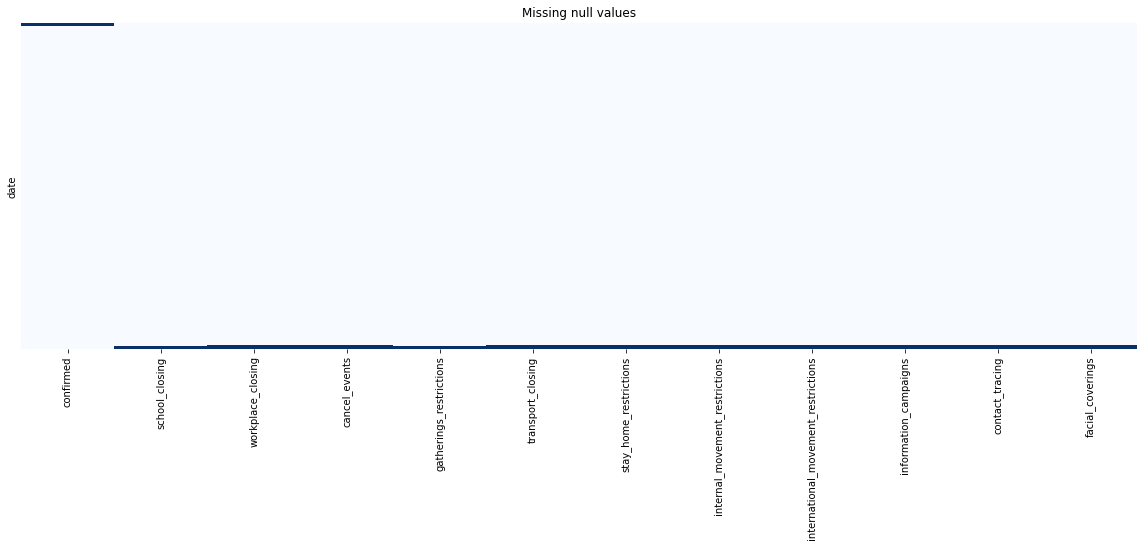

In [18]:
plt.rcParams['figure.figsize'] = (20,6)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = "Blues")
plt.title("Missing null values")

> ## calculationg the missing values and percentage ,storing the missing values in a dataframe 

In [19]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=round((df.isna().sum()/len(df)*100),2)

In [20]:
null

,Null Values,% Missing Values
confirmed,8,1.03
school_closing,6,0.77
workplace_closing,10,1.28
cancel_events,10,1.28
gatherings_restrictions,6,0.77
transport_closing,10,1.28
stay_home_restrictions,10,1.28
internal_movement_restrictions,10,1.28
international_movement_restrictions,10,1.28
information_campaigns,10,1.28


>> ## plotting the missing value of df using plotly

In [21]:
fig = px.bar(null, y='% Missing Values',
             hover_data=['Null Values'], color='% Missing Values',
             labels={'% Missing Values'}, height=400)
fig.update_layout(autosize=False,height=800, width=1500, title_text="% Missing Values",template = "plotly_white",
                xaxis_title='Columns',yaxis_title='Missing Percentage',)
fig.update_xaxes(type='category')

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)  
fig.show()


In [22]:
df = df.round(2)

In [23]:
df.tail(5)

,confirmed,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
date,,,,,,,,,,,,
2022-03-06,42967315.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-07,42971308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-08,42975883.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-09,42980067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-10,42984261.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#filling the nan values with 0
df = df.fillna(0)
df.isna().sum()

confirmed                              0
school_closing                         0
workplace_closing                      0
cancel_events                          0
gatherings_restrictions                0
transport_closing                      0
stay_home_restrictions                 0
internal_movement_restrictions         0
international_movement_restrictions    0
information_campaigns                  0
contact_tracing                        0
facial_coverings                       0
dtype: int64

In [25]:
df.dropna(inplace=True)

In [26]:
df.isna().sum()

confirmed                              0
school_closing                         0
workplace_closing                      0
cancel_events                          0
gatherings_restrictions                0
transport_closing                      0
stay_home_restrictions                 0
internal_movement_restrictions         0
international_movement_restrictions    0
information_campaigns                  0
contact_tracing                        0
facial_coverings                       0
dtype: int64

In [27]:
 # Describe is used to give us the summary of the dataset
df.describe()

,confirmed,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
count,7.790000e+02,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,1.680317e+07,2.403081,2.071887,1.783055,3.275995,1.184852,2.198973,1.591784,2.924262,1.915276,1.414634,3.412067
std,1.473802e+07,0.902320,1.008941,0.553484,1.239693,0.903706,0.641495,0.736653,0.928367,0.333263,0.528218,1.280026
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.882000e+06,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,4.000000
50%,1.091659e+07,3.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,4.000000
75%,3.267249e+07,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,4.000000
max,4.298426e+07,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,4.000000


In [28]:
# if some columns are showing large numbers than we can use these fucntions 
pd.set_option('mode.use_inf_as_na', True)  # >>>>>>>>>> changing if infinite values are present than treat them as nan
pd.options.display.float_format = "{:.2f}".format # >>> chaning the displaying format 

In [29]:
df.describe()

,confirmed,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
count,779.00,779.00,779.00,779.00,779.00,779.00,779.00,779.00,779.00,779.00,779.00,779.00
mean,16803174.03,2.40,2.07,1.78,3.28,1.18,2.20,1.59,2.92,1.92,1.41,3.41
std,14738022.56,0.90,1.01,0.55,1.24,0.90,0.64,0.74,0.93,0.33,0.53,1.28
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1881999.50,2.00,2.00,2.00,2.00,0.00,2.00,1.00,2.00,2.00,1.00,4.00
50%,10916589.00,3.00,2.00,2.00,4.00,2.00,2.00,2.00,3.00,2.00,1.00,4.00
75%,32672488.50,3.00,3.00,2.00,4.00,2.00,3.00,2.00,4.00,2.00,2.00,4.00
max,42984261.00,3.00,3.00,2.00,4.00,2.00,3.00,2.00,4.00,2.00,2.00,4.00


> ## using dictionary to convert specific columns

In [30]:

convert_dict = {'confirmed': int,
                'school_closing': int,
                'workplace_closing': int,
                'cancel_events' : int,
                'gatherings_restrictions' : int,
                'transport_closing' : int,
                'stay_home_restrictions' : int,
                'internal_movement_restrictions' : int,
                'international_movement_restrictions' : int,
                'information_campaigns' : int,
                'contact_tracing' : int,
                'facial_coverings' : int,
                }
 
df = df.astype(convert_dict)
print(df.dtypes)

confirmed                              int64
school_closing                         int64
workplace_closing                      int64
cancel_events                          int64
gatherings_restrictions                int64
transport_closing                      int64
stay_home_restrictions                 int64
internal_movement_restrictions         int64
international_movement_restrictions    int64
information_campaigns                  int64
contact_tracing                        int64
facial_coverings                       int64
dtype: object


In [31]:
df.dtypes.value_counts()

int64    12
dtype: int64

In [32]:
print('mean of confirmed cases',round(df['confirmed'].mean()))
print('max of confirmed cases',round(df['confirmed'].max()))
print('min of confirmed cases',round(df['confirmed'].min()))

mean of confirmed cases 16803174
max of confirmed cases 42984261
min of confirmed cases 0


In [33]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x = df.index, y = df['confirmed'],
                line = dict(color = 'yellowgreen', width = 1.5),
                 )
)
fig.update_layout(autosize=False,height=500, width=1000, title_text="Confirmed cases",template = "plotly_dark",)
#fig.update_xaxes(type='category')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)  

fig.update_layout(legend_title_text='Confirmed cases')
fig.show()

>>> using matplotlib cyberpunk theme

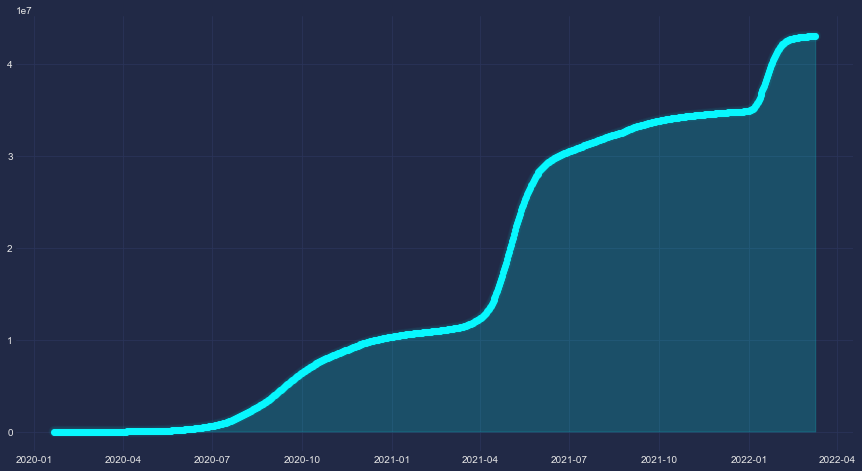

In [34]:
import mplcyberpunk
plt.style.use("cyberpunk")
plt.figure(figsize=(15, 8))
plt.plot(df['confirmed'], marker = 'o')

mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()
plt.show()

> ## using seaborn to plot all the variables 

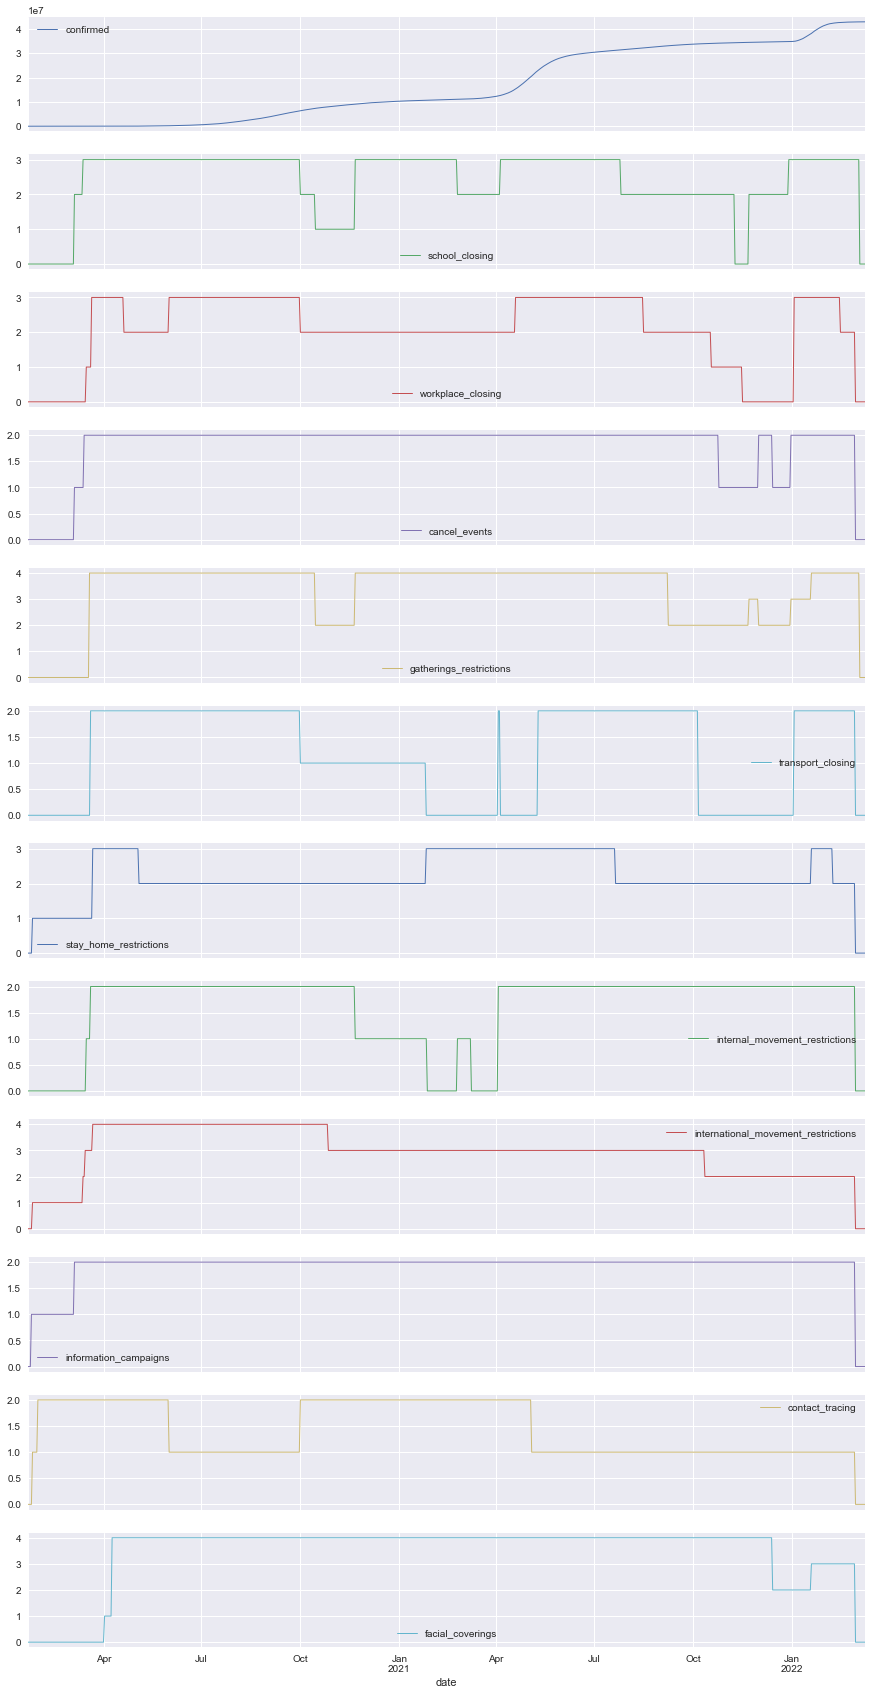

In [35]:
plt.style.use("seaborn")
axes=df[["confirmed", "school_closing",'workplace_closing','cancel_events','gatherings_restrictions','transport_closing','stay_home_restrictions','internal_movement_restrictions','international_movement_restrictions','information_campaigns','contact_tracing','facial_coverings']].plot(figsize=(15, 30), subplots=True, linewidth=1)

In [36]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

>> ## using plotly 

In [37]:
fig = make_subplots(rows=6, cols=2,subplot_titles=("confirmed", "school_closing", "workplace_closing", "cancel_events","gatherings_restrictions","transport_closing",
'stay_home_restrictions','internal_movement_restrictions','international_movement_restrictions','contact_tracing','facial_coverings'),
            specs=[[{}, {}],[{}, {}],[{}, {}],[{}, {}],[{}, {}],
           [{"colspan": 2}, None],],  )


fig.add_trace(
    go.Scatter(x =df.index, y=df['confirmed'], name="confirmed"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x =df.index, y=df['school_closing'], name= 'school_closing'),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x =df.index, y=df['workplace_closing'], name="workplace_closing"),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x =df.index, y=df['cancel_events'], name= 'cancel_events'),
    row=2, col=2
)

fig.add_trace(
    go.Scatter( x =df.index,y=df['gatherings_restrictions'], name="gatherings_restrictions"),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x =df.index, y=df['transport_closing'], name= 'transport_closing'),
    row=3, col=2
)

fig.add_trace(
    go.Scatter(x =df.index, y=df['stay_home_restrictions'], name= 'stay_home_restrictions'),
    row=4, col=1
)

fig.add_trace(
    go.Scatter(x =df.index, y=df['internal_movement_restrictions'], name= 'internal_movement_restrictions'),
    row=4, col=2
)

fig.add_trace(
    go.Scatter(x =df.index, y=df['international_movement_restrictions'], name= 'international_movement_restrictions'),
    row=5, col=1
)
fig.add_trace(
    go.Scatter( x =df.index,y=df['contact_tracing'], name= 'contact_tracing'),
    row=5, col=2
)

fig.add_trace(
    go.Scatter(x =df.index, y=df['facial_coverings'], name= 'facial_coverings'),
    row=6, col=1
)

""""
# Update xaxis properties
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Months", row=1, col=2)
fig.update_xaxes(title_text="Months", row=2, col=1)
fig.update_xaxes(title_text="Months", row=2, col=2)
fig.update_xaxes(title_text="Months", row=3, col=1)
fig.update_xaxes(title_text="Months", row=3, col=2)
fig.update_xaxes(title_text="Months", row=4, col=1)
fig.update_xaxes(title_text="Months", row=4, col=2)

# Update yaxis properties

fig.update_yaxes(title_text="sales", row=1, col=1)
fig.update_yaxes(title_text="sales", row=1, col=2)
fig.update_yaxes(title_text="sales", row=2, col=1)
fig.update_yaxes(title_text="sales", row=2, col=2)
fig.update_yaxes(title_text="sales", row=3, col=1)
fig.update_yaxes(title_text="sales", row=3, col=2)
fig.update_yaxes(title_text="total sales", row=4, col=1)
fig.update_yaxes(title_text="total profit", row=4, col=2)
fig.update_yaxes(title_text="average sales", row=5, col=1)
"""
fig.update_layout(autosize=False,height=2000, width=1600, title_text="cases and lockdown measures",template = "plotly_dark",)
#fig.update_yaxes(type='category')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)  


fig.update_layout(legend_title_text='Trend')
fig.show()

> ## using correlation to find out lockdowns help in reducing the casees or not 

In [38]:
klib.corr_mat(df) # returns a color-encoded correlation matrix

,confirmed,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
confirmed,1.00,-0.03,-0.07,0.02,-0.02,-0.01,0.11,0.29,-0.47,0.07,-0.59,0.12
school_closing,-0.03,1.00,0.67,0.72,0.80,0.50,0.53,0.35,0.57,0.58,-0.04,0.42
workplace_closing,-0.07,0.67,1.00,0.76,0.76,0.73,0.58,0.49,0.70,0.52,-0.11,0.51
cancel_events,0.02,0.72,0.76,1.00,0.76,0.51,0.64,0.51,0.75,0.82,0.09,0.72
gatherings_restrictions,-0.02,0.80,0.76,0.76,1.00,0.52,0.65,0.37,0.68,0.57,0.02,0.63
transport_closing,-0.01,0.50,0.73,0.51,0.52,1.00,0.19,0.60,0.56,0.33,-0.31,0.28
stay_home_restrictions,0.11,0.53,0.58,0.64,0.65,0.19,1.00,0.28,0.46,0.64,0.20,0.54
internal_movement_restrictions,0.29,0.35,0.49,0.51,0.37,0.60,0.28,1.00,0.47,0.55,-0.40,0.46
international_movement_restrictions,-0.47,0.57,0.70,0.75,0.68,0.56,0.46,0.47,1.00,0.64,0.20,0.61
information_campaigns,0.07,0.58,0.52,0.82,0.57,0.33,0.64,0.55,0.64,1.00,0.15,0.68


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

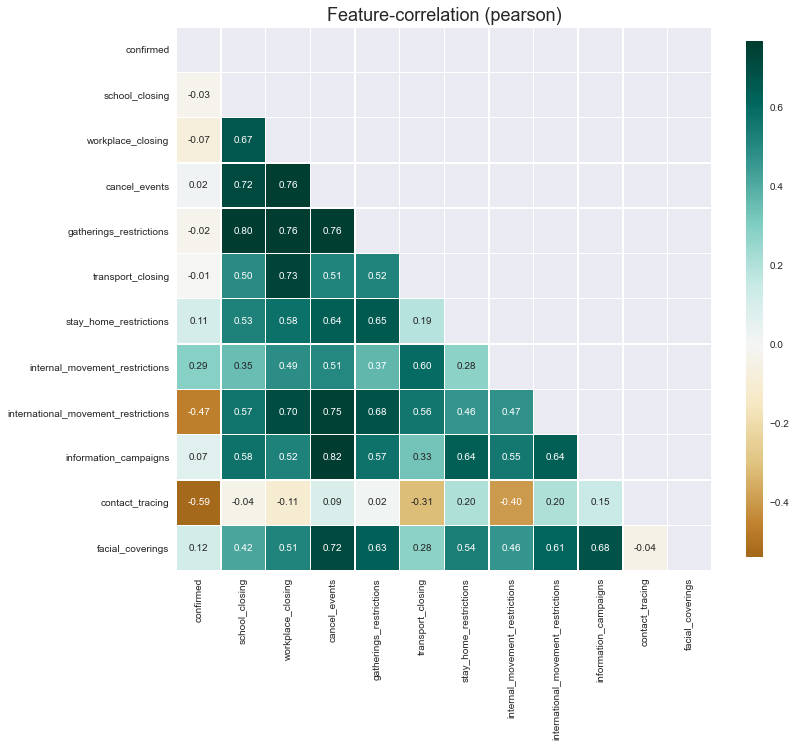

In [39]:
klib.corr_plot(df) #plotting corr matrix by using klib lib

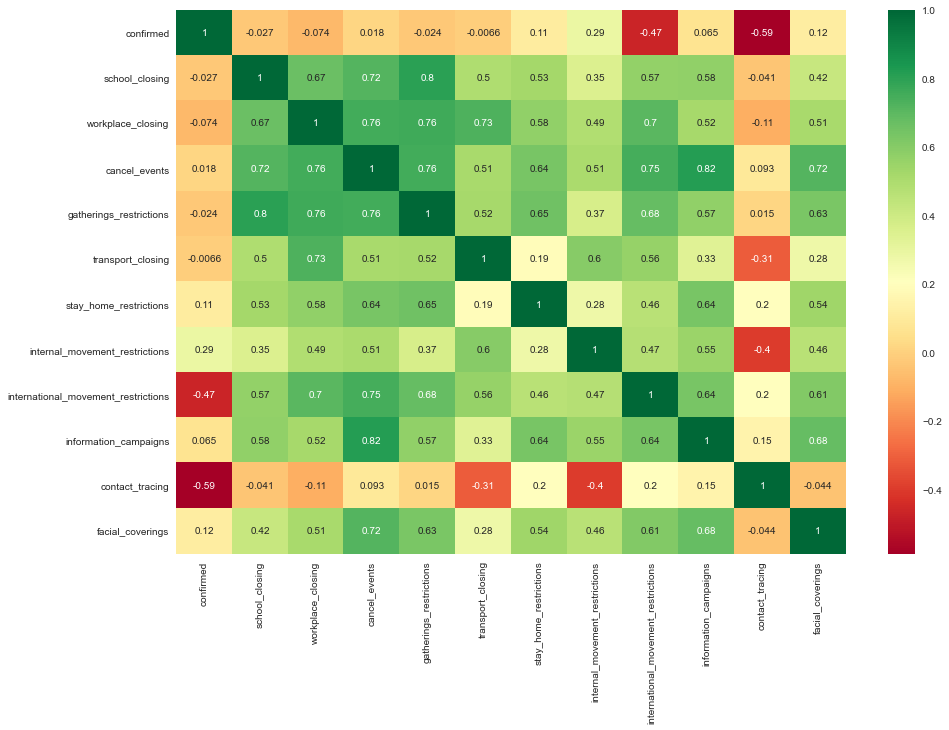

In [40]:
corrs = df.corr()
corrs
plt.figure(figsize=(15,10))
sns.heatmap(corrs, cmap='RdYlGn', annot=True)
plt.show()

In [41]:
neg_corr = corrs[corr < 0]
plt.figure(figsize=(12,8))
sns.heatmap(neg_corr, cmap="Reds",annot=True)

NameError: name 'corr' is not defined

In [ ]:
neg_corr

,confirmed,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
confirmed,NaN,-0.03,-0.07,0.02,-0.02,-0.01,0.11,0.29,-0.47,NaN,-0.59,NaN
school_closing,-0.03,NaN,NaN,NaN,NaN,0.50,NaN,NaN,NaN,0.58,-0.04,0.42
workplace_closing,-0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70,0.52,NaN,0.51
cancel_events,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.51,NaN,0.82,NaN,0.72
gatherings_restrictions,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.68,0.57,NaN,0.63
transport_closing,-0.01,0.50,NaN,NaN,NaN,NaN,NaN,NaN,0.56,0.33,NaN,0.28
stay_home_restrictions,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.64,NaN,0.54
internal_movement_restrictions,0.29,NaN,NaN,0.51,NaN,NaN,NaN,NaN,0.47,0.55,NaN,0.46
international_movement_restrictions,-0.47,NaN,0.70,NaN,0.68,0.56,NaN,0.47,NaN,NaN,NaN,0.61
information_campaigns,NaN,0.58,0.52,0.82,0.57,0.33,0.64,0.55,NaN,NaN,0.15,NaN


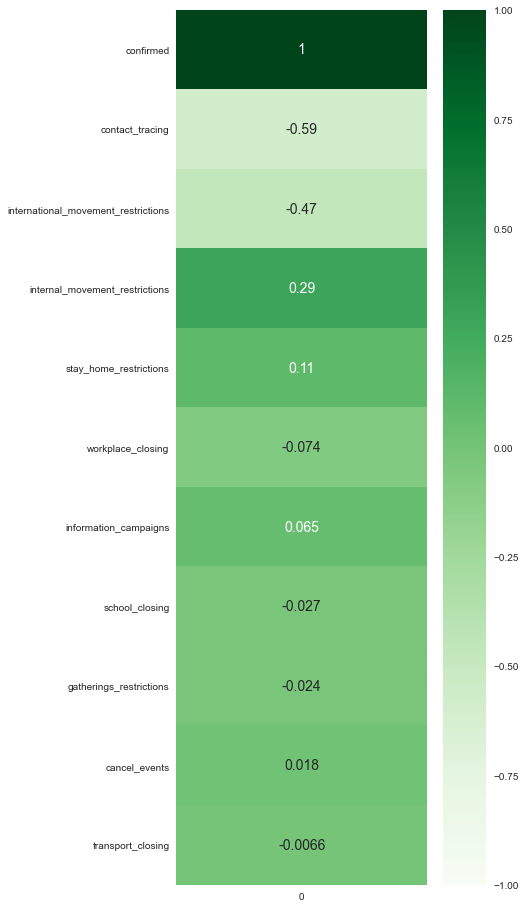

In [ ]:
# Exploring Relationships with our target:

correlations = df.corrwith(df['confirmed']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(5,15))
sns.heatmap(sorted_correlations.to_frame(), cmap='Greens', annot=True, vmin=-1, vmax=1, ax=ax);

# Findings
* as we can see above the correlation matrix shows some info that lockdowns actually didn't helped much in reducing the cases
* also the most lockdown measure helped in reducing some cases is transport closing